# Customers segmentation

**Las Wagones** is a company selling IT equipment , from small consumable items to large printers. Las Wagones has identified 4 customers segments noted _A, B, C and D_. These segments have been identified by the Sales department based on a study of the historical buying behavior of the customers. The Marketing department is very interested in understanding who are the customers inside these segments at an early stage. They ordered you for a study. This study aims at understanding what are these 4 segments.

In [3]:
# Load the nbresult package to be able to save your results 
from nbresult import ChallengeResult

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

## Data collection (9.5%)

### Loading data from the database

Download the `customers.sqlite` database from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite) and store it inside the `db` folder:

In [5]:
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite >> db/customers.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  608k  100  608k    0     0  1016k      0 --:--:-- --:--:-- --:--:-- 1016k


#### Database schema

**📝 Open the `db/customers.sqlite` from your favorite SQL client and draw the database schema on the [schema editor](https://kitt.lewagon.com/db) on Kitt. Save the schema as `customers.xml` in the `db` folder.**

#### Querying the data

We want to get the following information about **all** the 8068 customers from the database:
- `id`: the unique identifier of the customer
- `gender`: customer's gender
- `married`: whether or not the customer has ever been married
- `age`: customer's age
- `graduated`: whether or not the customer has a degree
- `score`: customer's spending score (first order)
- `family_size`: the number of members of the customer's family, including the customer
- `profession`: customer's profession
- `work_experience`: customer's work experience in years
- `segment`: the segment the customer belongs to

**📝 Write the SQL query you need to fetch the data. Save it as a `str` in the `query` variable.**

In [6]:
query = '''
SELECT c.id, c.gender, c.married, 
c.age, c.graduated, c.score,
COUNT(r.id) family_size,
p.category, e.duration, c.segment
FROM customers c
LEFT JOIN experiences e ON e.customer_id = c.id
LEFT JOIN professions p ON p.id = e.profession_id
LEFT JOIN relatives r ON r.customer_id = c.id
GROUP BY c.id
'''

**📝 Connect to the database, execute the query and store the results into a `DataFrame` named `data`. Display the 10 first rows and the shape of the dataset.**

In [7]:
import sqlite3
import pandas as pd

In [8]:
conn = sqlite3.connect("db/customers.sqlite")

data = pd.read_sql_query(query, conn)
data.head(10)

id  gender married age graduated    score  family_size       category  \
0   1    Male      No  22        No      Low            3     Healthcare   
1   2  Female     Yes  38       Yes  Average            2       Engineer   
2   3  Female     Yes  67       Yes      Low            0       Engineer   
3   4    Male     Yes  67       Yes     High            1         Lawyer   
4   5  Female     Yes  40       Yes     High            5  Entertainment   
5   6    Male     Yes  56        No  Average            1         Artist   
6   7    Male      No  32       Yes      Low            2     Healthcare   
7   8  Female      No  33       Yes      Low            2     Healthcare   
8   9  Female     Yes  61       Yes      Low            2       Engineer   
9  10  Female     Yes  55       Yes  Average            3         Artist   

   duration segment  
0       1.0       D  
1       NaN       A  
2       1.0       B  
3       0.0       B  
4       NaN       A  
5       0.0       C  
6       1.0       C  
7       1.0       D  
8       0.0       D  
9       1.0       C

In [9]:
data.shape

(8068, 10)

#### 💾 Save your results

Run the following cell to save your results.

In [10]:
ChallengeResult('sql', query=query).write()

### Loading data from a CSV file

**📝 Load the data from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.csv) inside a `DataFrame` named `customers`.** 

Also, you can download the dataset into the `data` directory.

In [11]:
customers = pd.read_csv('data/customers.csv')

**💾 Save your results**

Run the following cell to save your results.

In [12]:
ChallengeResult('csv', data=customers).write()

## Data consulting challenge (33%)

### Data analysis & presentation

> Who are the customers composing the 4 segments? 

Based on the analysis of the `customers` dataset, prepare a slides deck to present your conclusions to the Marketing manager Debrah. The presentation must contain **5 slides maximum** (including the title slide). Feel free to choose the slide app of your choice.

ℹ️ Debrah is in fond of illustrations and statistics!

⚠️ Save your presentation in the current directory!

In [13]:
import pandas_profiling

In [ ]:
customers.profile_report()

In [14]:
a_customers = customers[customers['Segmentation'] == 'A'].drop(columns='Segmentation')

In [15]:
b_customers = customers[customers['Segmentation'] == 'B'].drop(columns='Segmentation')

In [16]:
c_customers = customers[customers['Segmentation'] == 'C'].drop(columns='Segmentation')

In [17]:
d_customers = customers[customers['Segmentation'] == 'D'].drop(columns='Segmentation')

In [ ]:
a_customers.profile_report()

In [ ]:
b_customers.profile_report()

In [ ]:
c_customers.profile_report()

In [ ]:
d_customers.profile_report()

In [18]:
customers.sort_values(by='Segmentation', inplace=True)

In [ ]:
sns.countplot(x='Segmentation', hue='Gender', data=customers)

In [ ]:
sns.countplot(x='Segmentation', hue='Spending_Score', data=customers)

In [ ]:
sns.countplot(x='Segmentation', hue='Graduated', data=customers)

In [ ]:
d_customers['Age'].mean()

In [ ]:
d_customers[d_customers['Graduated'] == 'Yes']

In [ ]:
sns.distplot(customers['Family_Size'], kde=False)

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Profession', data=d_customers)
plt.title('Profession Distribution')

### Segmentation relevance

Debrah has a doubt about the number of customers segments designed by the Sales department. Base on an empirical method, the elbow method, and a clustering approach **can you tell her if it is an optimal segmentation or not?**

Store the optimal number of segments inside the `n_clusters` variable.

#### Empirical view
While the D segment is atypical, it looks hard to really differentiate the three first segments.

#### Elbow method

In [1]:
from sklearn.cluster import KMeans

In [20]:
categorical_features = ['Gender', 'Ever_Married', 'Profession', 'Spending_Score']
continuous_features = ['Age', 'Work_Experience', 'Family_Size']

##### Encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)

In [47]:
ohe.fit(customers[['Gender']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [48]:
gender_encoded = ohe.transform(customers[['Gender']])

In [49]:
customers['Female'], customers['Male'] = gender_encoded.T

In [40]:
customers['Ever_Married'].fillna('No', inplace=True)

In [50]:
ohe.fit(customers[['Ever_Married']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [51]:
married_encoded = ohe.transform(customers[['Ever_Married']])

In [52]:
customers['Never_Married'], customers['Married'] = married_encoded.T

In [57]:
customers['Profession'].fillna('Unknown', inplace=True)

In [58]:
ohe.fit(customers[['Profession']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [59]:
profession_encoded = ohe.transform(customers[['Profession']])

In [64]:
customers.Spending_Score.unique()

array(['Low', 'Average', 'High'], dtype=object)

In [61]:
customers['Artist'], customers['Doctor'], customers['Engineer'], customers['Entertainment'],\
customers['Executive'], customers['Healthcare'], customers['Homemaker'], customers['Lawyer'],\
customers['Marketing'], customers['Unknown'] = profession_encoded.T

In [89]:
ohe.fit(customers[['Spending_Score']])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

In [91]:
spending_score_encoded = ohe.transform(customers[['Spending_Score']])

In [92]:
customers['Average_SC'], customers['High_SC'], customers['Low_SC'] = spending_score_encoded.T

In [94]:
customers_encoded = customers.drop(columns=['Gender', 'Ever_Married', 'Profession', 'Spending_Score', 'Segmentation'])

In [101]:
customers_encoded.drop(columns='ID', inplace=True)

##### Scaling

In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
mms = MinMaxScaler()

In [104]:
customers_scaled = mms.fit_transform(customers_encoded)

##### Elbow method

In [107]:
customers_encoded.dropna(inplace=True)

In [105]:
from sklearn.cluster import KMeans

In [108]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(customers_encoded)
    Sum_of_squared_distances.append(km.inertia_)

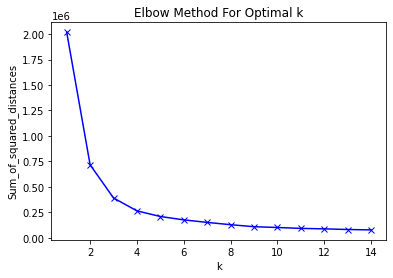

In [109]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [110]:
n_clusters = 3

**💾 Save your results**

Run the following cell to save your results.

In [111]:
ChallengeResult('clusters', n_clusters=n_clusters).write()

### Segment D statistics

In addition the marketing team is really interested in the **segment D** so you will have to answer some questions about it. 

To do so, we are considering a binary segmentation: **D vs the rest**. Download the `customers_encoded.csv` dataset from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers_encoded.csv) and store it into the `data` folder.

#### Loading data

In [112]:
customers_encoded = pd.read_csv('data/customers_encoded.csv')

After loading the data you can see a new column `is_D` which take the value `1` if the customer belongs to the segment D, `0` otherwise.

#### Age analysis of segment D

❓ Using a statistical test, show than customers from segment D are **statistically younger** than the whole customers. 

Store the $p-value$ of your test inside a `p_value` variable.

In [114]:
customers_encoded.head(5)

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size Segmentation  is_D  
0            Low          4.0            D     1  
1        Average          3.0            A     0  
2            Low          1.0            B     0  
3           High          2.0            B     0  
4           High          6.0            A     0

In [116]:
import statsmodels.formula.api as smf

In [118]:
model1 = smf.logit(formula='is_D ~ Age', data=customers_encoded).fit()

Optimization terminated successfully.
         Current function value: 0.507995
         Iterations 6


In [119]:
model1.params

Intercept    1.860245
Age         -0.070970
dtype: float64

Interpretation: diminishing the age of 1 year increases the log odds to be segmented in D by 0,07

In [123]:
model1.pvalues['Age']

3.283952338015081e-213

In [124]:
p_value = model1.pvalues['Age']

#### Segment D odds analysis

❓ What are the **odds** for a customer to be in the segment D?

Store the result inside a `odds` variable.

In [131]:
customers_encoded.shape

(8068, 11)

In [130]:
customers_encoded.groupby('is_D').count()

ID  Gender  Ever_Married   Age  Graduated  Profession  \
is_D                                                            
0     5800    5800          5712  5800       5743        5727   
1     2268    2268          2216  2268       2247        2217   

      Work_Experience  Spending_Score  Family_Size  Segmentation  
is_D                                                              
0                5259            5800         5618          5800  
1                1980            2268         2115          2268

In [132]:
p = 2268 / 8068

In [133]:
odds = p / (1-p)

❓ Considering a **married and graduated** customer, how are the odds of being part of segment D **multiplied** while **increasing** the age by 1 year?

Store the result inside a `odds_variation` variable.

In [138]:
customers_married = customers_encoded[customers_encoded['Ever_Married'] == 'Yes']

In [139]:
customers_married_and_graduated = customers_married[customers_married['Graduated'] == 'Yes']

In [140]:
customers_married_and_graduated.drop(columns=['Ever_Married', 'Graduated'], inplace=True)

/home/victordedalus/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [141]:
customers_married_and_graduated.head(5)

ID  Gender  Age     Profession  Work_Experience Spending_Score  \
1  462643  Female   38       Engineer              NaN        Average   
2  466315  Female   67       Engineer              1.0            Low   
3  461735    Male   67         Lawyer              0.0           High   
4  462669  Female   40  Entertainment              NaN           High   
8  465015  Female   61       Engineer              0.0            Low   

   Family_Size Segmentation  is_D  
1          3.0            A     0  
2          1.0            B     0  
3          2.0            B     0  
4          6.0            A     0  
8          3.0            D     1

In [142]:
model2 = smf.logit(formula='is_D ~ Age', data=customers_married_and_graduated).fit()

Optimization terminated successfully.
         Current function value: 0.285276
         Iterations 7


In [144]:
model2.params['Age']

-0.023062261386234014

In [147]:
odds_variation = np.exp(model2.params['Age'])

In [148]:
odds_variation

0.9772016399504528

####  💾 Save your results

Run the following cell to save your results.

In [149]:
ChallengeResult('segment_d', p_value=p_value, odds=odds, gap=odds_variation).write()

**⚠️ Save your notebook then commit and push your code on GitHub**